In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('appstore_games.csv') #Reading CSV file

In [3]:
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11-07-2008,30-05-2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11-07-2008,17-05-2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11-07-2008,05-09-2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23-07-2008,30-05-2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18-07-2008,22-07-2018


# DATA CLEANING

In [4]:
#Removing Empty values in User Rating Count
df['User Rating Count'].replace('', np.nan, inplace=True)
df.dropna(subset=['User Rating Count'], inplace=True)

In [5]:
len(df) # No. of from 17007 to 7561

7561

In [6]:
# Droping unwanted columns and Games with less than 200 user rating
df.drop(['URL', 'ID', 'Subtitle', 'Icon URL', 'Description', 'Developer', 'Languages'], axis = 1, inplace = True)
df['time'] = (pd.to_datetime(df['Original Release Date']) - pd.to_datetime(df['Current Version Release Date'])) <= \
			datetime.timedelta(days=180)
df = df[df['User Rating Count'] >= 200]
df = df[df['time']]
df.drop('time', axis=1, inplace=True)

In [7]:
len(df)

2232

In [8]:
df.drop(['Current Version Release Date', 'Original Release Date', 'Primary Genre'], axis=1, inplace=True)
#Removed Released Date columns

In [9]:
df.columns

Index(['Name', 'Average User Rating', 'User Rating Count', 'Price',
       'In-app Purchases', 'Age Rating', 'Size', 'Genres'],
      dtype='object')

In [10]:
new = df['Genres'].str.split(', ', expand=True)
new.replace('Games', '', inplace=True)
new.replace('Entertainment', '', inplace=True)
new.replace('Strategy', '', inplace=True)
new.replace('Board', 'Puzzle', inplace=True)
new.replace('Role', 'Adventure', inplace=True)
new.replace('Role Playing', 'Adventure', inplace=True)
new.replace('Education', 'Family', inplace=True)
new.replace('', np.nan, inplace=True)
df['Genres'] = new[[0, 1, 2, 3]].apply(lambda x: ','.join(x.dropna()), axis=1)
df['Primary_Genre'] = df['Genres'].str.split(',', expand=True)[0]
df['Primary_Genre'].replace('', np.nan, inplace=True)
df.dropna(subset=['Primary_Genre'], inplace=True)
df['Average_User_Rating'] = df['Average User Rating']

In [11]:
df['Primary_Genre'].value_counts()

Puzzle                    477
Simulation                455
Adventure                 410
Action                    392
Card                      120
Family                    109
Casual                    100
Sports                     34
Social Networking          11
Utilities                   9
Lifestyle                   8
Music                       8
Trivia                      8
Finance                     8
Casino                      5
Racing                      5
Reference                   4
Health & Fitness            4
Word                        4
Navigation                  3
Business                    2
Medical                     2
News                        2
Magazines & Newspapers      1
Photo & Video               1
Travel                      1
Books                       1
Name: Primary_Genre, dtype: int64

In [12]:
df.columns

Index(['Name', 'Average User Rating', 'User Rating Count', 'Price',
       'In-app Purchases', 'Age Rating', 'Size', 'Genres', 'Primary_Genre',
       'Average_User_Rating'],
      dtype='object')

In [13]:
df.drop(['Average User Rating','Genres'], axis=1, inplace=True)

In [14]:
df.columns

Index(['Name', 'User Rating Count', 'Price', 'In-app Purchases', 'Age Rating',
       'Size', 'Primary_Genre', 'Average_User_Rating'],
      dtype='object')

#  Identify Which Genres Have Higher User Ratings

In [15]:
Rating = [df.Primary_Genre[(df['Primary_Genre']=='Puzzle')].count(),df.Primary_Genre[(df['Primary_Genre']=='Action')].count(),\
     df.Primary_Genre[(df['Primary_Genre']=='Adventure')].count(),df.Primary_Genre[(df['Primary_Genre']=='Family')].count(),\
     df.Primary_Genre[(df['Primary_Genre']=='Simulation')].count(),df.Primary_Genre[(df['Primary_Genre']=='Card')].count(),\
     df.Primary_Genre[(df['Primary_Genre']=='Casual')].count(), df.Primary_Genre[(df['Primary_Genre']=='Sports')].count(),\
     df.Primary_Genre[(df['Primary_Genre']=='Social Networking')].count() ]
genres = ['Puzzle','Action','Adventure','Family','Simulation','Card','Casual', 'Sports','Social']

In [16]:
su = sum(Rating)
rating_percentage = []
for i in range(len(Rating)):
	rating_percentage.append(round((Rating[i]/su)*100,2))
print(rating_percentage)

[22.63, 18.6, 19.45, 5.17, 21.58, 5.69, 4.74, 1.61, 0.52]


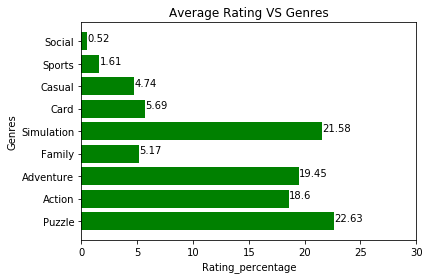

In [17]:
plt.barh(genres, rating_percentage, color='g')
for index, value in enumerate(rating_percentage):
    plt.text(value, index, str(value))
plt.ylabel('Genres')
plt.xlabel('Rating_percentage')
plt.title('Average Rating VS Genres')
plt.xlim(0, 30)
plt.show()

In [18]:
R = [df.Average_User_Rating[(df['Primary_Genre']=='Puzzle')].sum(),df.Average_User_Rating[(df['Primary_Genre']=='Action')].sum(),\
     df.Average_User_Rating[(df['Primary_Genre']=='Adventure')].sum(),df.Average_User_Rating[(df['Primary_Genre']=='Family')].sum(),\
     df.Average_User_Rating[(df['Primary_Genre']=='Simulation')].sum(),df.Average_User_Rating[(df['Primary_Genre']=='Card')].sum(),\
     df.Average_User_Rating[(df['Primary_Genre']=='Casual')].sum(), df.Average_User_Rating[(df['Primary_Genre']=='Sports')].sum(),\
     df.Average_User_Rating[(df['Primary_Genre']=='Social Networking')].sum() ]

me = []
for i in range(len(R)):
	me.append(round(R[i]/Rating[i],2))

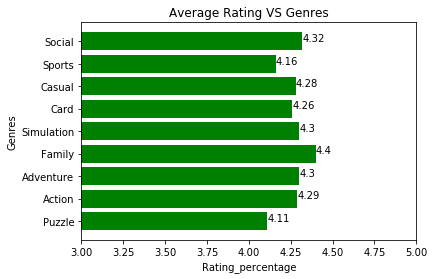

In [19]:
plt.barh(genres, me, color='g')
for index, value in enumerate(me):
    plt.text(value, index, str(value))
plt.ylabel('Genres')
plt.xlabel('Rating_percentage')
plt.title('Average Rating VS Genres')
plt.xlim(3, 5)
plt.show()

In [20]:
array = ['Puzzle', 'Adventure', 'Action', 'Family','Simulation', 'Card', 'Casual']
df = df.loc[df['Primary_Genre'].isin(array)]

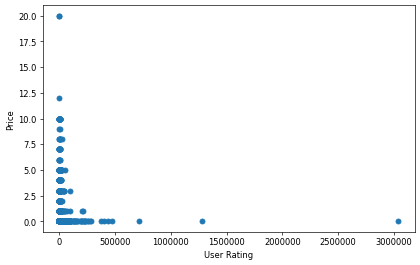

In [21]:
plt.figure(figsize=(8,5),dpi=60)
plt.scatter(df["User Rating Count"],df["Price"])
plt.xlabel('User Rating')
plt.ylabel('Price')
plt.show()

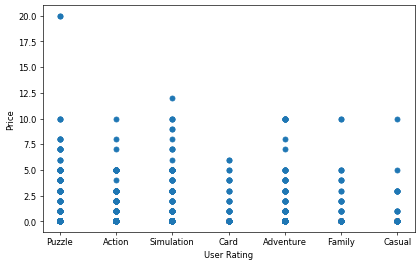

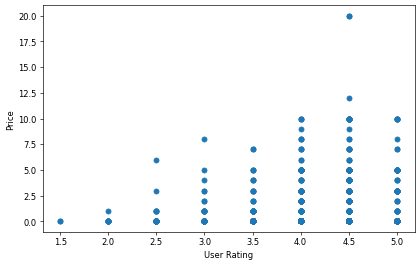

In [22]:
plt.figure(figsize=(8,5),dpi=60)
plt.scatter(df["Primary_Genre"],df["Price"])
plt.xlabel('User Rating')
plt.ylabel('Price')
plt.show()
plt.figure(figsize=(8,5),dpi=60)
plt.scatter(df["Average_User_Rating"],df["Price"])
plt.xlabel('User Rating')
plt.ylabel('Price')
plt.show()


Inference made:
* As per User rating count Genre for Games are as follows Puzzle > Simulation > Adventure > Action > Card etc. But, Average user rating follows Family > Social > Action >Adventure > ........ >Puzzle this order. 
* We know that they are very less apps based on Social, Sports, Family, News, Life Style, 
* Almost many app developers focus revenue on In-app Purchases.
* Almost 95% of apps in 'App Store' are Free!!.
* Paid apps have better reviews and ratings that are above 7.5.
* on average most of the genres have rating between 4.00 and 4.50.